In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from mpitree.decision_tree import DecisionTreeClassifier

np.random.seed = 42

In [2]:
def plot_tree_clf_boundary(clf, X, y, /, *, feature_names=None):
    if not isinstance(X, np.ndarray):
        X = X.to_numpy()
    if not isinstance(y, np.ndarray):
        y = y.to_numpy()

    h = 0.02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(["#4993c3", "#e73031", "#e3c471"])
    cmap_bold = ListedColormap(["#0000ec", "#ff0000", "#bfbf00"])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max] x [y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_t = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=feature_names)

    Z = np.array([clf.predict(X_t.iloc[x]) for x in range(len(X_t))]).reshape(xx.shape)

    plt.figure()
    plt.contour(xx, yy, Z, cmap="Greys", alpha=0.5)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap_bold,
        edgecolors="black",
        linewidths=1.5,
    )

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.title(f"Decision Tree Classifier")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])

    plt.show()

<built-in function lt> feature_1
<built-in function ge> feature_1
<built-in function lt> feature_0
<built-in function ge> feature_0
<built-in function lt> feature_1
<built-in function ge> feature_1
<built-in function lt> feature_1
<built-in function ge> feature_1
<built-in function lt> feature_0
<built-in function ge> feature_0
<built-in function lt> feature_1
<built-in function ge> feature_1
<built-in function lt> feature_0
<built-in function ge> feature_0
<built-in function lt> feature_0
<built-in function ge> feature_0
<built-in function lt> feature_1
<built-in function ge> feature_1
<built-in function lt> feature_1
<built-in function ge> feature_1
┌── feature_1
│  ├── feature_0 [< 0.15]
│  │  └── 0 [< -0.34]
│  │  ├── feature_1 [>= -0.34]
│  │  │  └── 1 [< -0.04]
│  │  │  ├── feature_1 [>= -0.04]
│  │  │  │  └── 1 [< 0.04]
│  │  │  │  └── 1 [>= 0.04]
│  ├── feature_0 [>= 0.15]
│  │  ├── feature_1 [< 1.50]
│  │  │  ├── feature_0 [< 0.77]
│  │  │  │  └── 0 [< -0.51]
│  │  │  │  ├── f

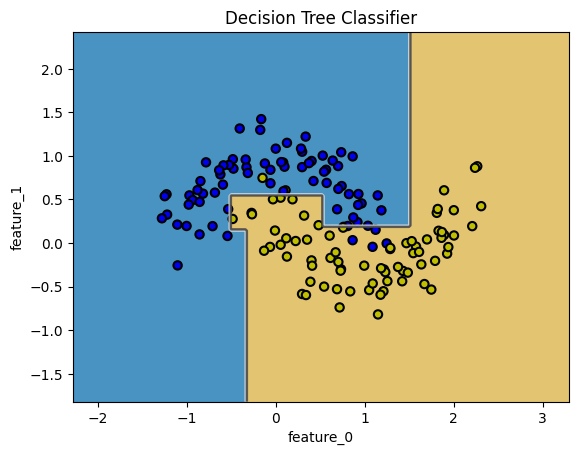

In [3]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

clf = DecisionTreeClassifier(criterion={"min_samples_split": 10}).fit(X_moons, y_moons)
print(clf)
plot_tree_clf_boundary(clf, X_moons, y_moons, feature_names=["feature_0", "feature_1"])

In [4]:
iris = load_iris(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(
    iris.data[["sepal length (cm)", "sepal width (cm)"]],
    iris.target,
    test_size=0.2,
    random_state=42,
)

In [5]:
clf = DecisionTreeClassifier(criterion={"max_depth": 2}).fit(X_train, y_train)
print(clf)

train_score, test_score = clf.score(X_train, y_train), clf.score(X_test, y_test)
print(f"\nTrain-Test Accuracy: ({train_score:.2%}, {test_score:.2%})")

print(f"\nPredict Probability: {clf.predict_prob(X_test.iloc[3]).round(3)}")

<built-in function lt> sepal length (cm)
<built-in function ge> sepal length (cm)
<built-in function lt> sepal width (cm)
<built-in function ge> sepal width (cm)
<built-in function lt> sepal width (cm)
<built-in function ge> sepal width (cm)
┌── sepal length (cm)
│  ├── sepal width (cm) [< 5.45]
│  │  └── 1 [< 2.80]
│  │  └── 0 [>= 2.80]
│  ├── sepal width (cm) [>= 5.45]
│  │  └── 2 [< 3.90]
│  │  └── 0 [>= 3.90]

Train-Test Accuracy: (68.33%, 63.33%)

Predict Probability: [0.027 0.014]


<built-in function lt> sepal length (cm)
<built-in function ge> sepal length (cm)
<built-in function lt> sepal length (cm)
<built-in function ge> sepal length (cm)
<built-in function lt> sepal width (cm)
<built-in function ge> sepal width (cm)
<built-in function lt> sepal length (cm)
<built-in function ge> sepal length (cm)
<built-in function lt> sepal length (cm)
<built-in function ge> sepal length (cm)
<built-in function lt> sepal width (cm)
<built-in function ge> sepal width (cm)
<built-in function lt> sepal length (cm)
<built-in function ge> sepal length (cm)
<built-in function lt> sepal length (cm)
<built-in function ge> sepal length (cm)
<built-in function lt> sepal width (cm)
<built-in function ge> sepal width (cm)
<built-in function lt> sepal length (cm)
<built-in function ge> sepal length (cm)
<built-in function lt> sepal length (cm)
<built-in function ge> sepal length (cm)
<built-in function lt> sepal width (cm)
<built-in function ge> sepal width (cm)
<built-in function lt> s

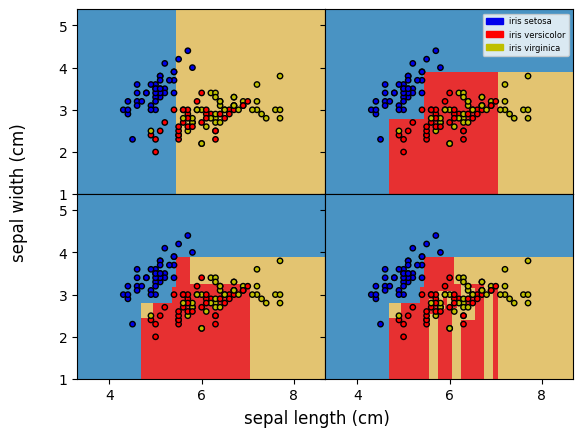

In [6]:
h = 0.02  # step size in the mesh

a = "#4993c3"
b = "#e73031"
c = "#e3c471"

aa = "#0000ec"
bb = "#ff0000"
cc = "#bfbf00"

# Create color maps
cmap_light = ListedColormap([a, b, c])
cmap_bold = ListedColormap([aa, bb, cc])

fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex="col", sharey="row")

depths = [1, 3, 5, np.inf]
coor = [ax1, ax2, ax3, ax4]

for depth, ax in zip(depths, coor):
    clf = DecisionTreeClassifier(criterion={"max_depth": depth}).fit(X_train, y_train)

    x_min, x_max = (
        X_train.values[:, 0].min() - 1,
        X_train.values[:, 0].max() + 1,
    )
    y_min, y_max = (
        X_train.values[:, 1].min() - 1,
        X_train.values[:, 1].max() + 1,
    )

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    X_t = pd.DataFrame(
        np.c_[xx.ravel(), yy.ravel()], columns=["sepal length (cm)", "sepal width (cm)"]
    )

    Z = np.array([clf.predict(X_t.iloc[x]) for x in range(len(X_t))])
    Z = Z.reshape(xx.shape)

    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    ax.scatter(
        X_train.values[:, 0],
        X_train.values[:, 1],
        c=y_train.values,
        cmap=cmap_bold,
        s=15,
        edgecolors="black",
        label=f"Depth={depth}",
    )

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    if depth == 3:
        patches = [
            mpatches.Patch(color=aa, label="iris setosa"),
            mpatches.Patch(color=bb, label="iris versicolor"),
            mpatches.Patch(color=cc, label="iris virginica"),
        ]
        handles, labels = ax.get_legend_handles_labels()
        ax.legend(handles=patches, prop={"size": 6})

fig.supxlabel("sepal length (cm)")
fig.supylabel("sepal width (cm)")

plt.show()

In [7]:
from sklearn.tree import DecisionTreeClassifier, export_text

iris = load_iris()
X, y = iris.data, iris.target
clf = DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
print(export_text(clf))

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_0 <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  5.95
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2

